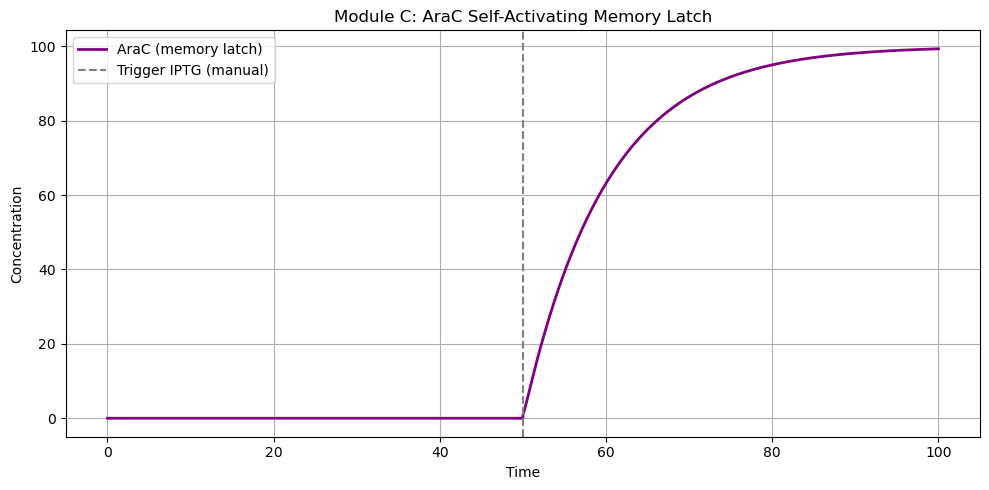

In [2]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

model = te.loada("""
model Model_C
//Species
species AraC
                 
// Parameters
k_araC = 10
k_deg_araC = 0.1
K = 1
n = 2
                 
// Self activation reaction (positive feedback)
J1: -> AraC; k_araC*(AraC^n/(K^n+AraC^n))
J2: AraC -> ; k_deg_araC*AraC
                 
AraC = 0 // Start OFF
end
""")

r6 = model.simulate(0, 50, 500)

model.AraC = 1.0
r7 = model.simulate(50, 100, 500)

r_combined3 = np.vstack((r6, r7))
time = r_combined3[:,0]
araC = r_combined3[:,1]

plt.figure(figsize=(10,5))
plt.plot(time, araC, label='AraC (memory latch)', linewidth=2, color='purple')
plt.axvline(x=50, linestyle='--', color='gray', label='Trigger IPTG (manual)')
plt.title("Module C: AraC Self-Activating Memory Latch")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()